In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import transbigdata as tbd
import warnings
warnings.filterwarnings('ignore')

import abm.ResultProcess as ResultProcess 

# 整理充电和等待订单

In [68]:


station_info = pd.read_csv('output/station_infos.csv')
charging_orders,waiting_orders = ResultProcess.order_from_station(station_info, step_length = 5*60)

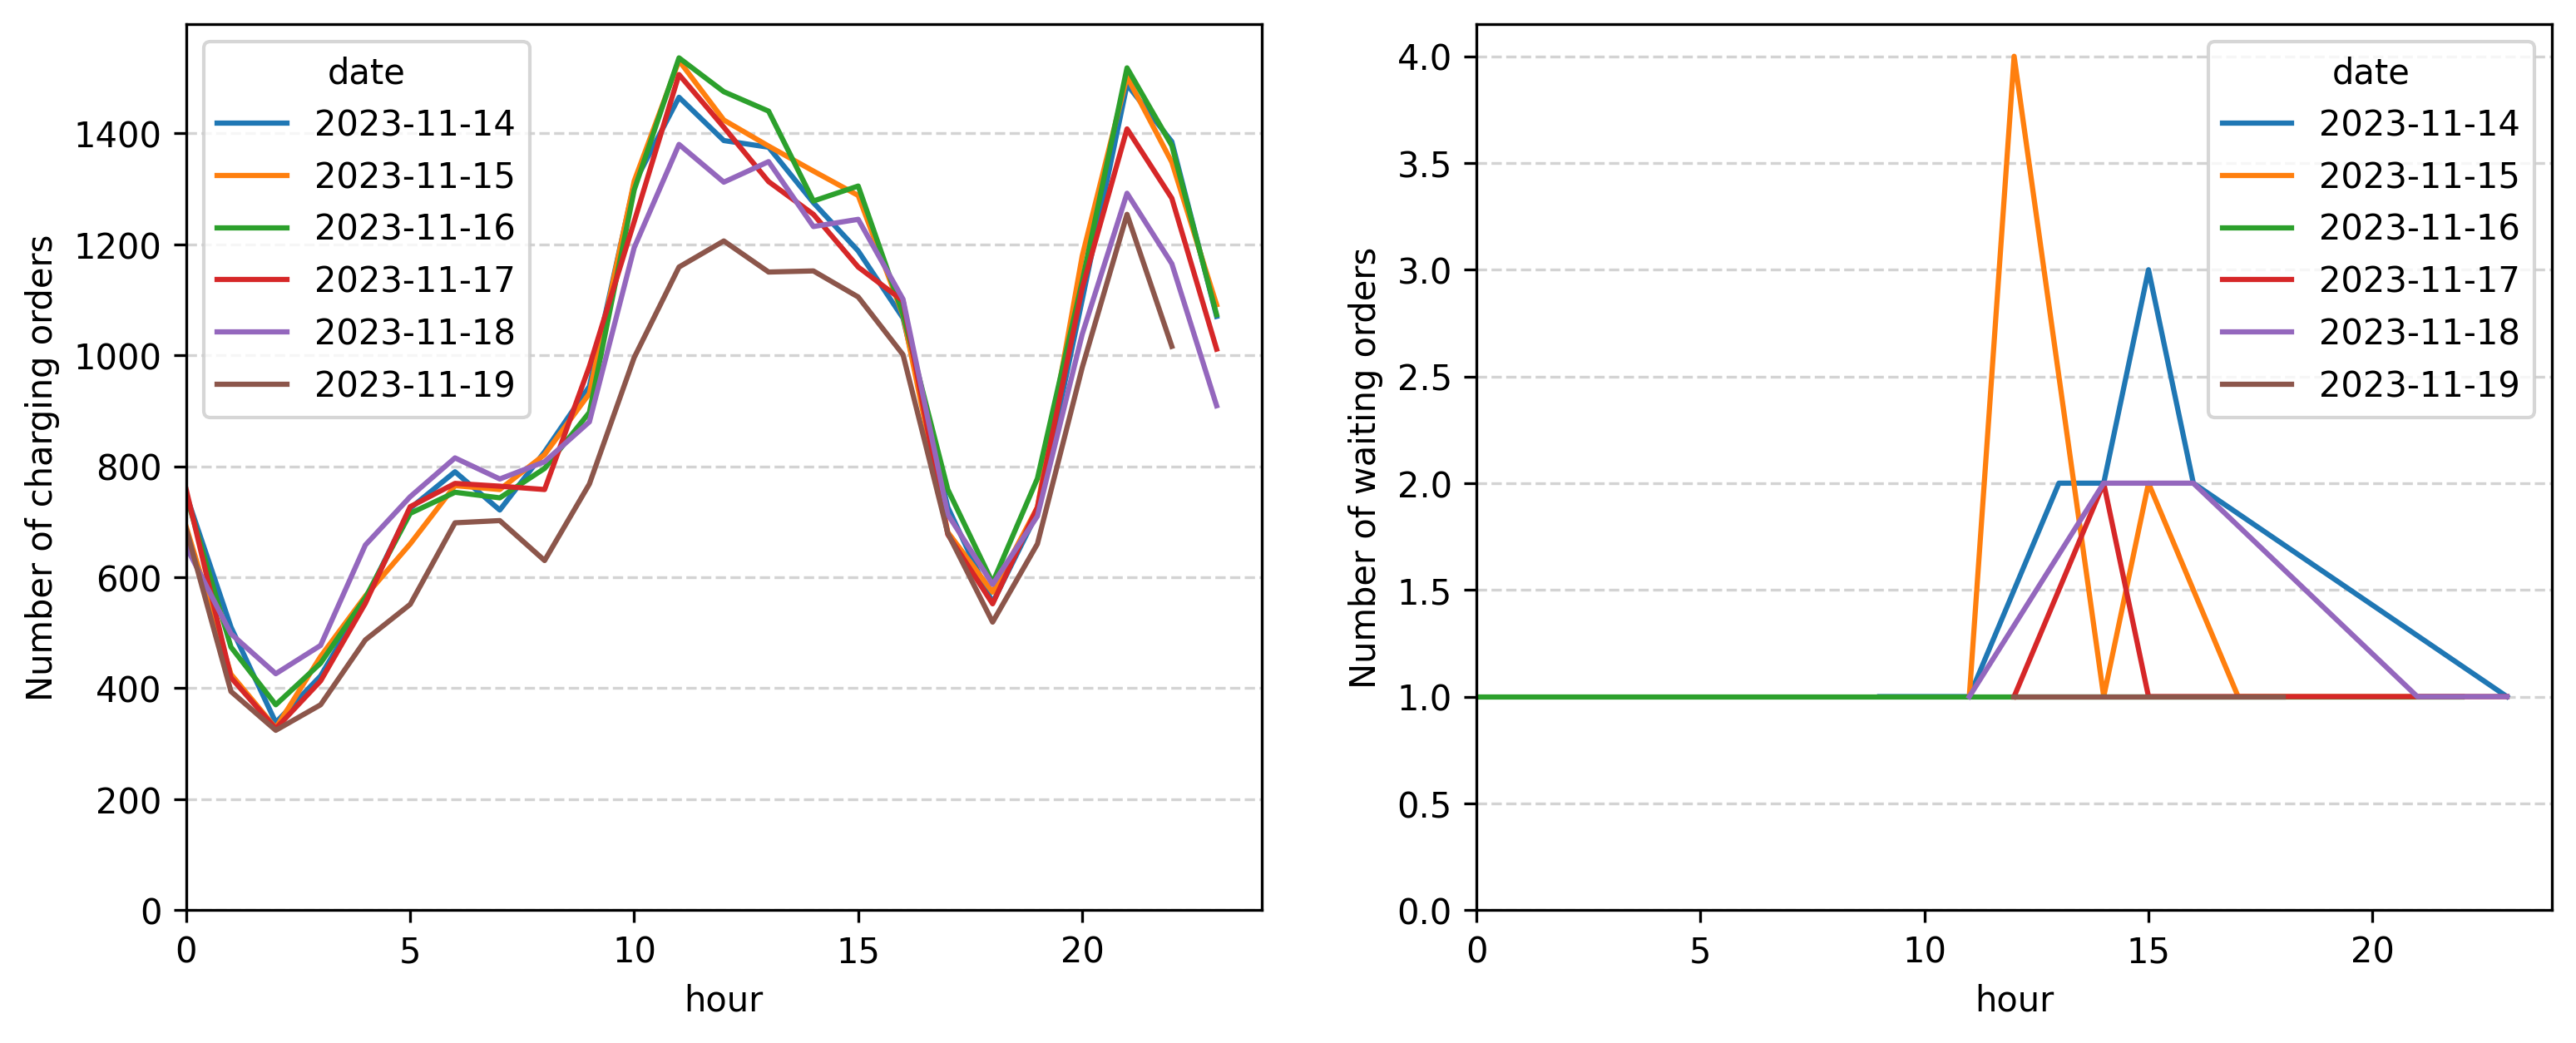

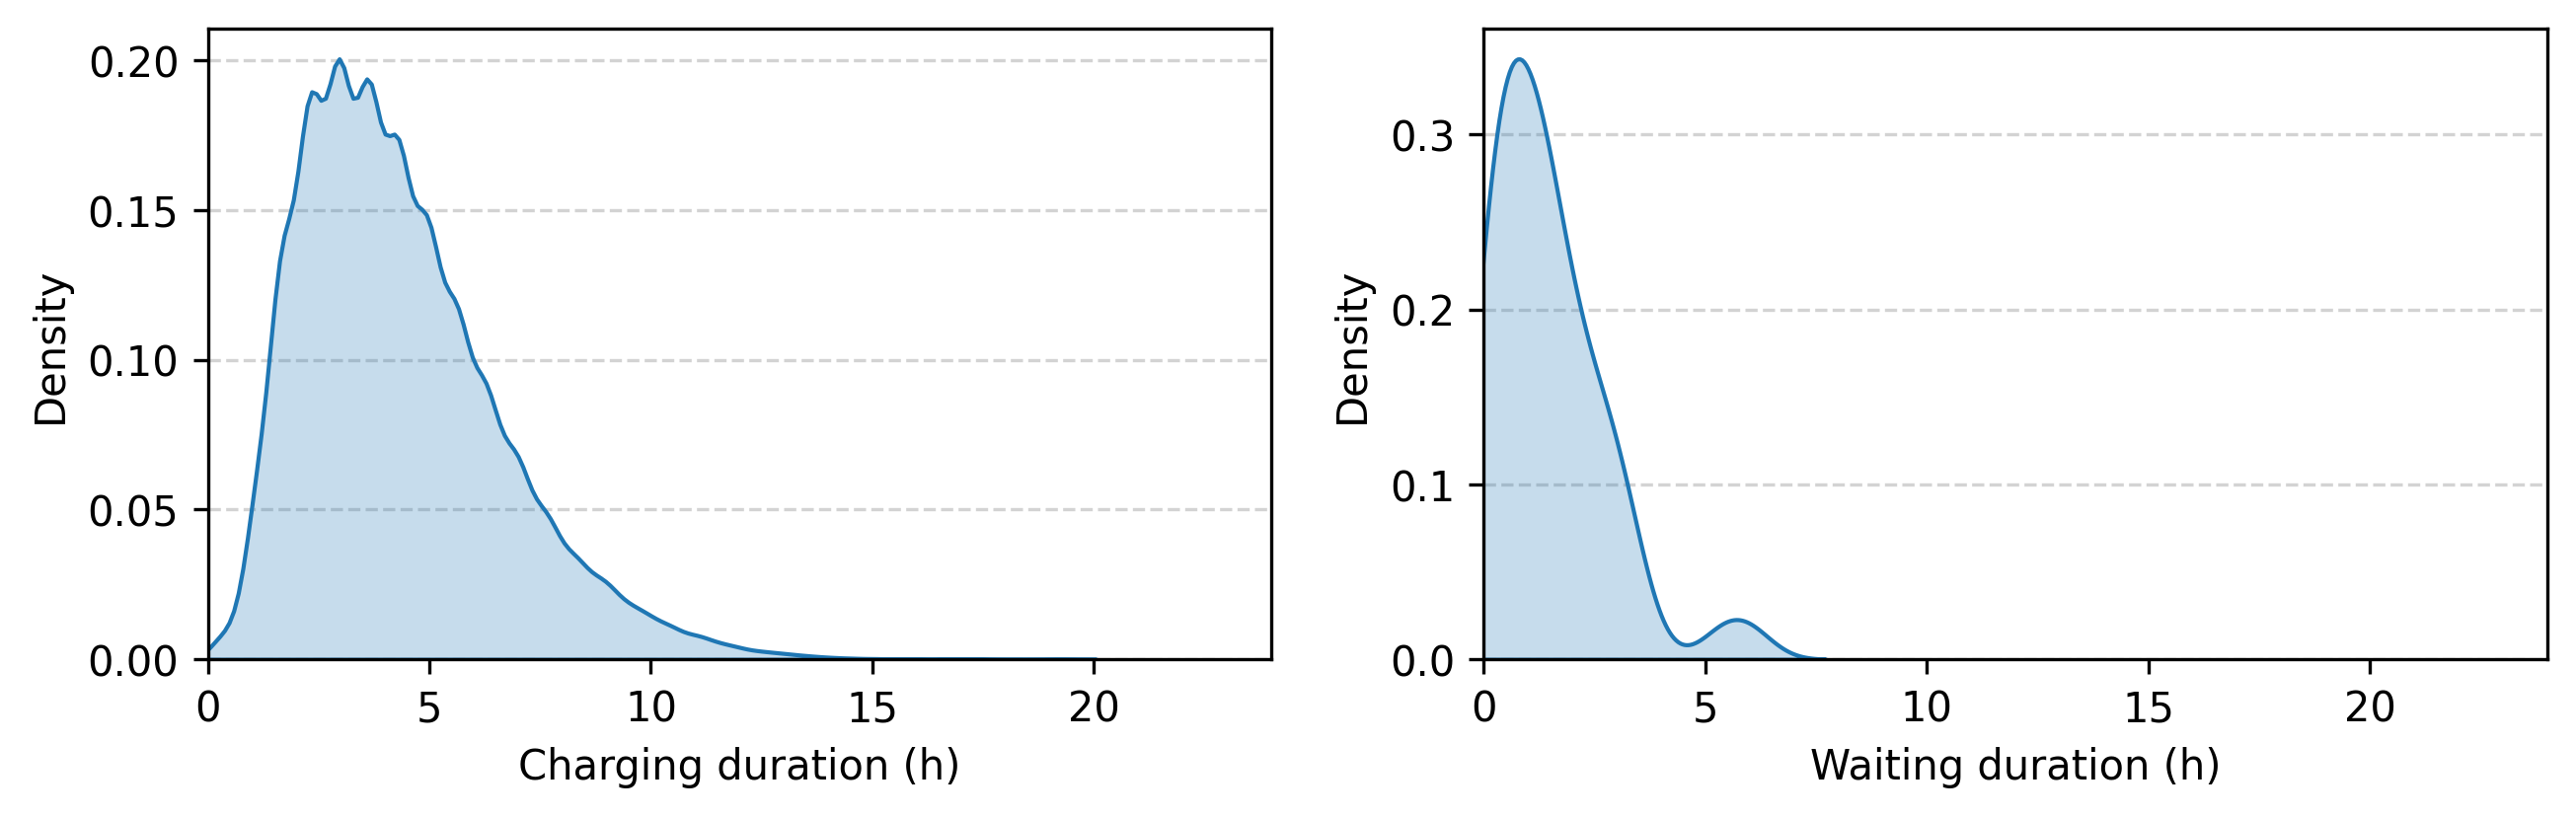

In [69]:

charging_orders.to_csv('output/charging_orders_from_station.csv',index=False)
waiting_orders.to_csv('output/waiting_orders_from_station.csv',index=False)

import datetime
# 去掉第一天的数据
charging_orders = charging_orders[charging_orders['date']>=datetime.date(2023, 11, 14)]
waiting_orders = waiting_orders[waiting_orders['date']>=datetime.date(2023, 11, 14)]
ResultProcess.plot_order_temporal(charging_orders,waiting_orders)
ResultProcess.plot_order_duration(charging_orders,waiting_orders)


# 整理车辆充电信息

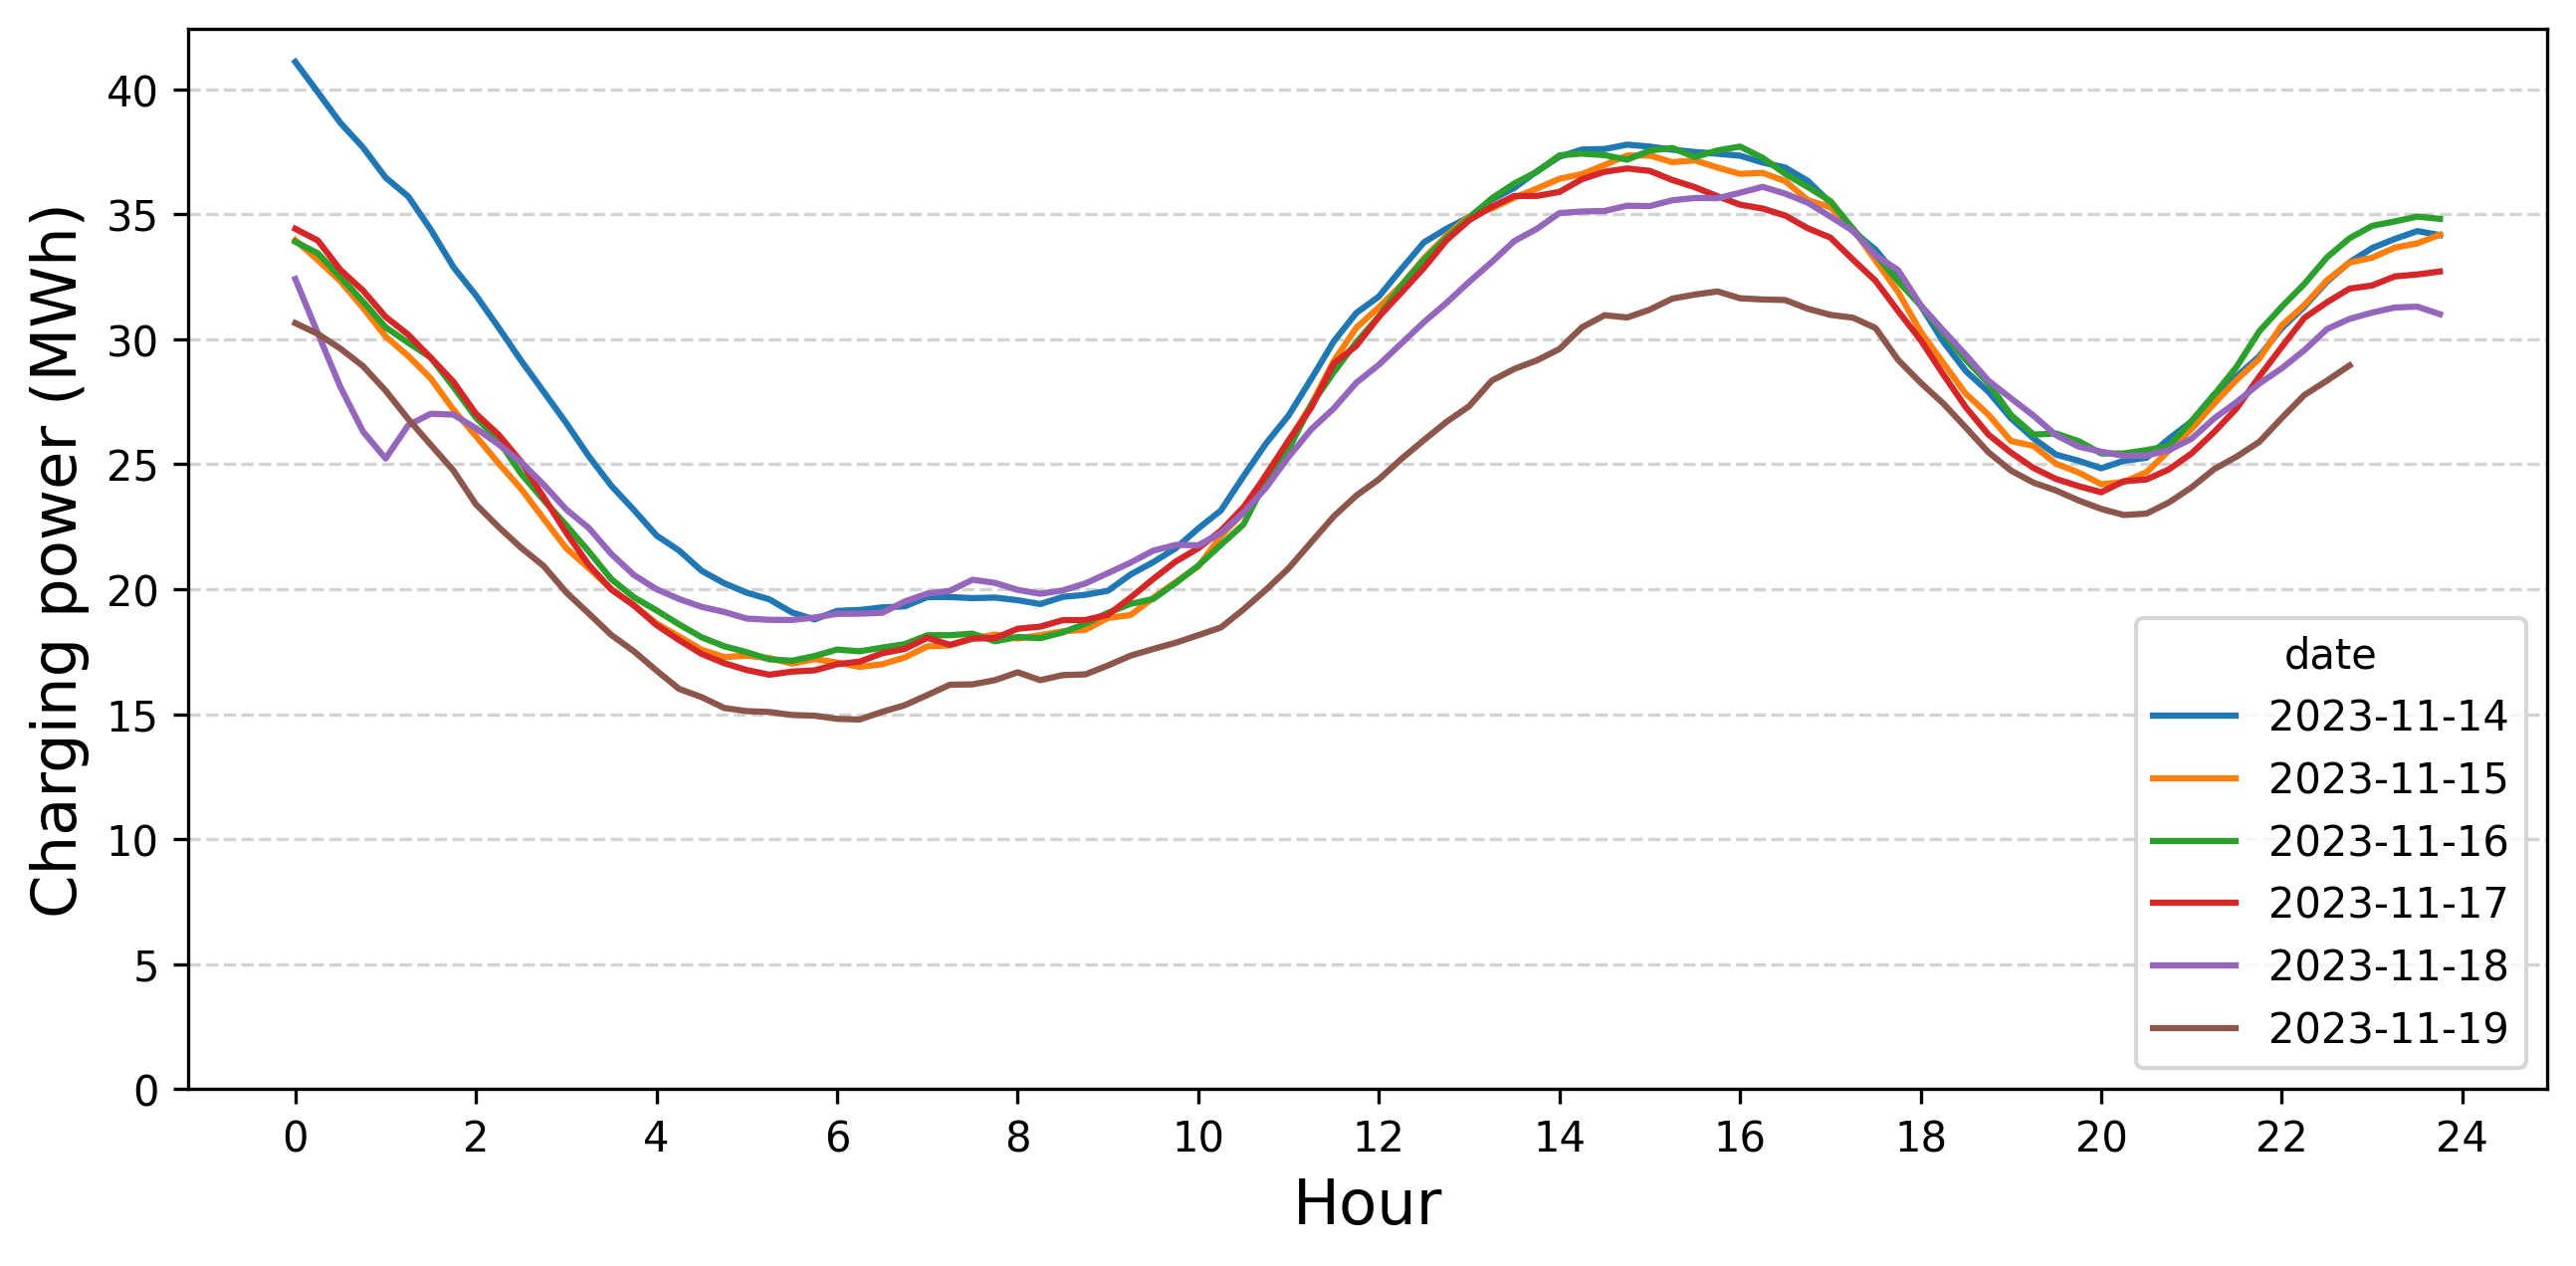

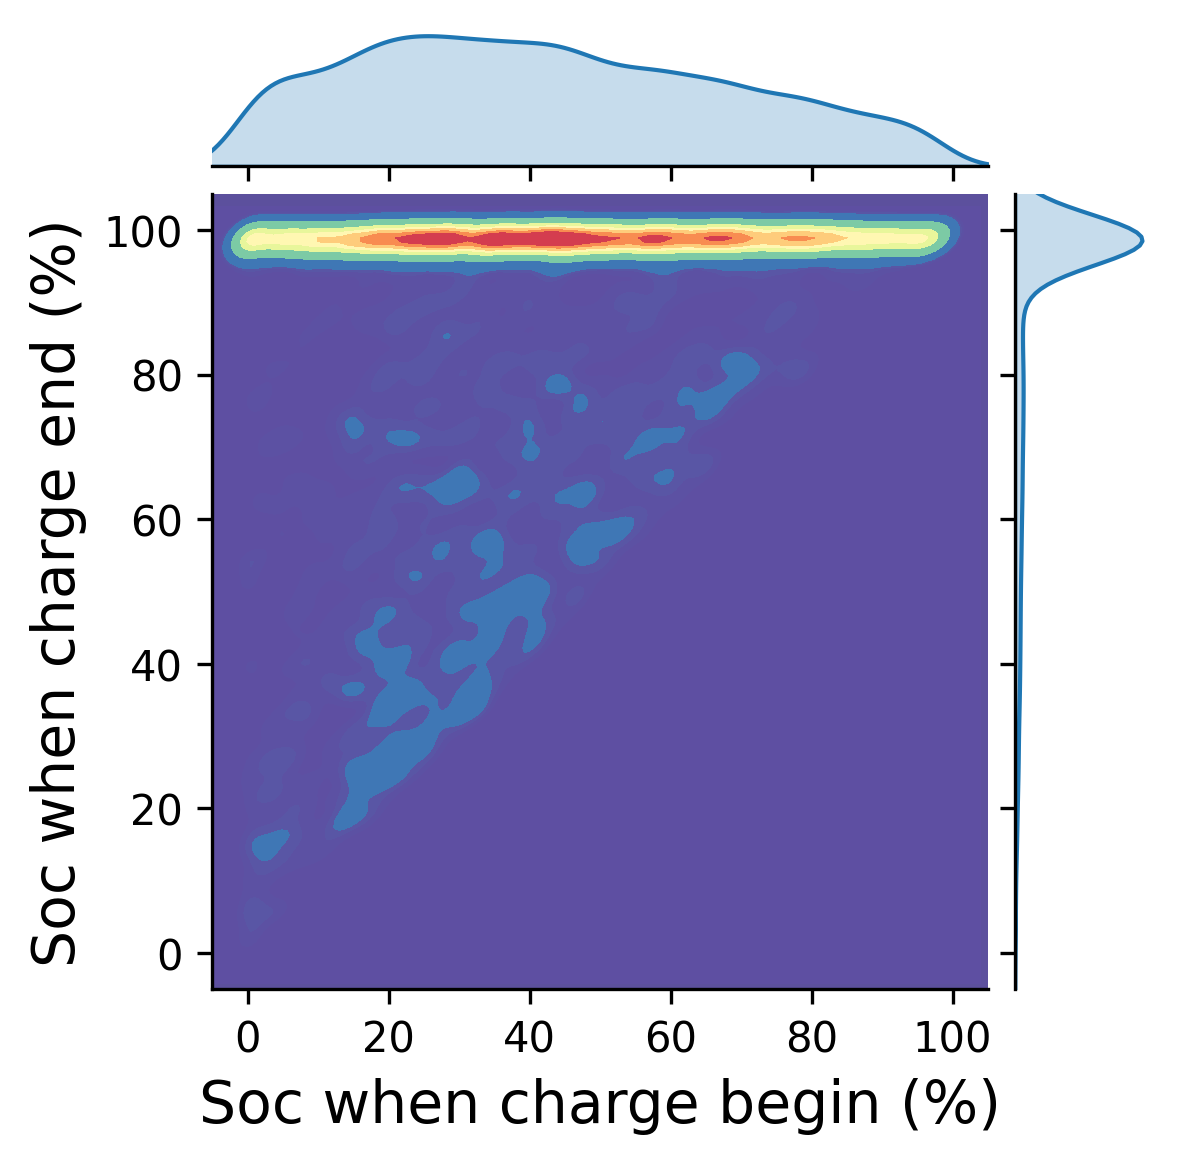

In [70]:

car_infos = pd.read_csv('output/car_infos.csv')
charging_order = ResultProcess.order_from_car(car_infos,step_length = 5*60)
charging_order.to_csv('output/charging_orders_from_car.csv',index=False)

timegap = 5*60
# 充电功率
daypower,locationpower = ResultProcess.power_from_order(charging_order,
                     stime=pd.to_datetime('2023-11-14 00:00:00'),
                     etime=pd.to_datetime('2023-11-20 00:00:00'),
                     timegap=60*15
                     )

# soc的联合分布
ResultProcess.plot_soc_jointplot(charging_order.sample(min(len(charging_order),10000)),'soc_start','soc_end',cbar = False,xlim = None,ylim = None,bw_adjust = 0.3)

# 停车需求识别

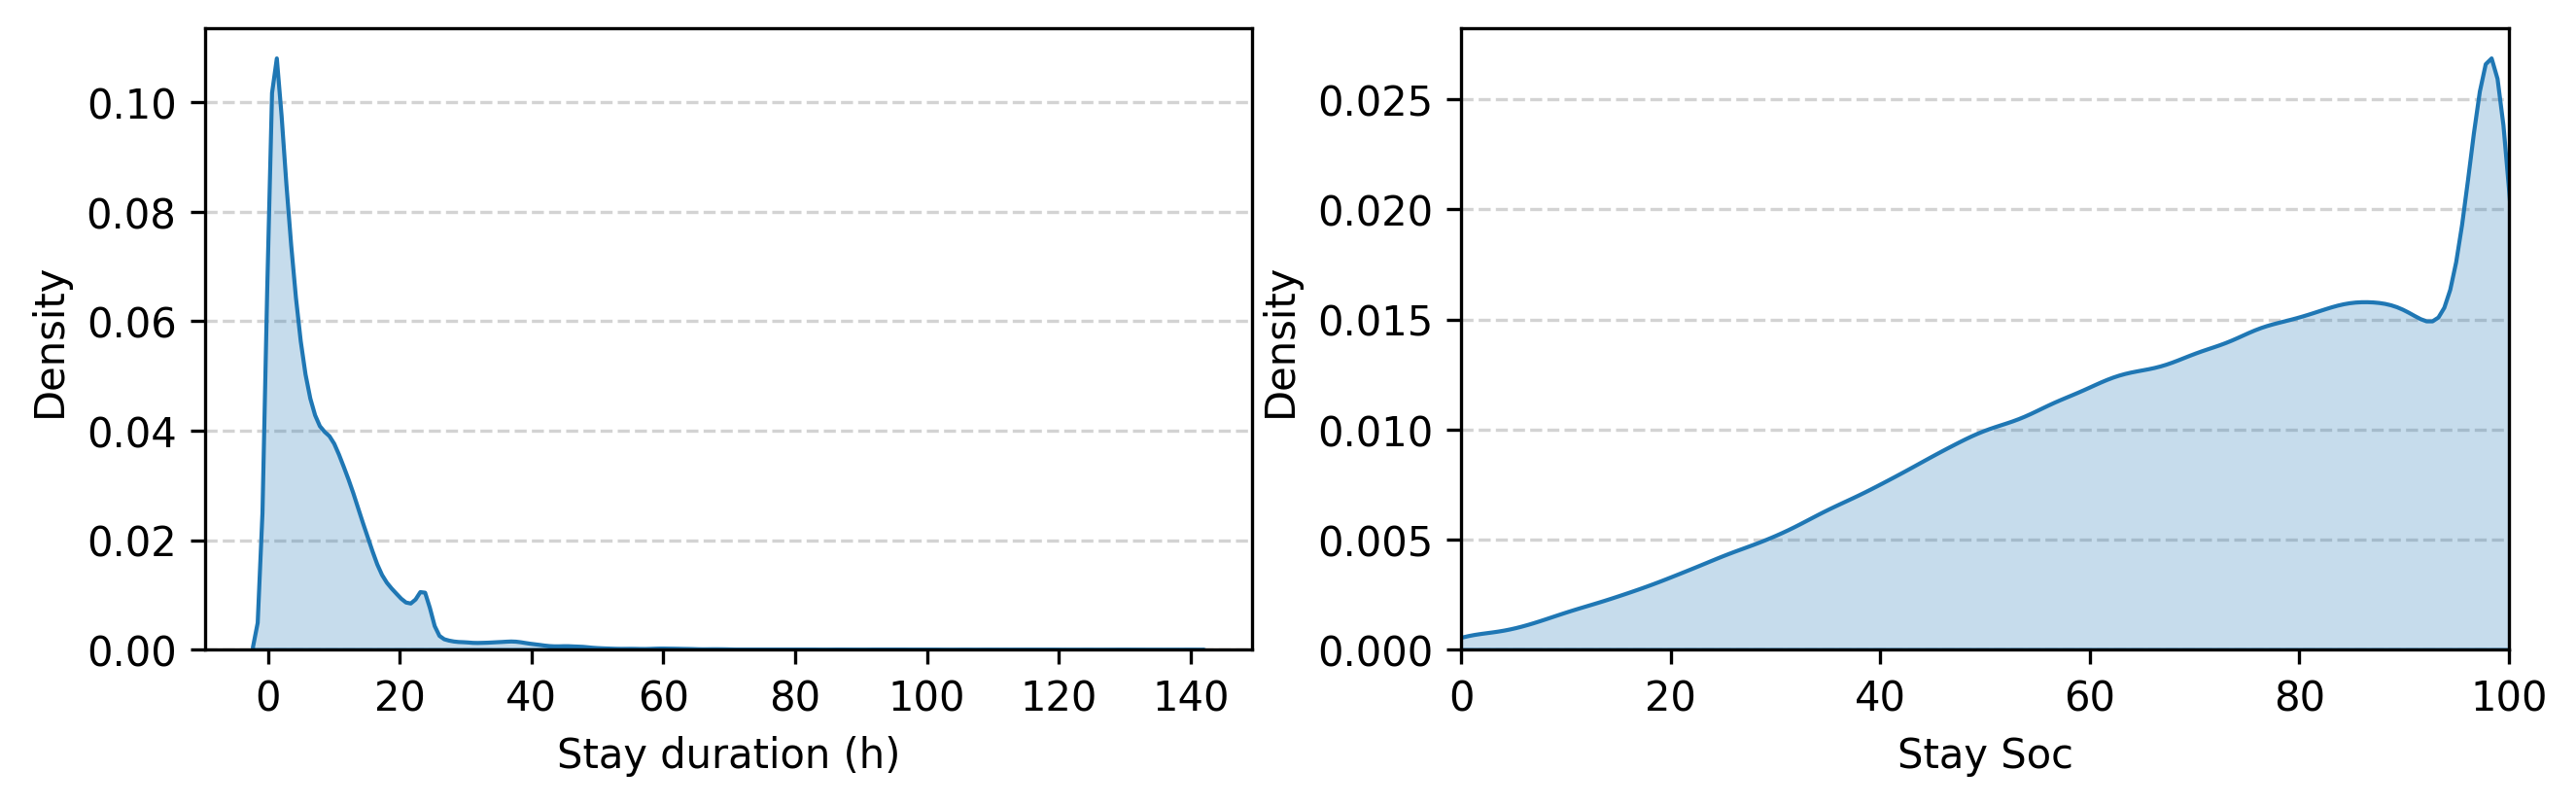

In [9]:
car_infos = pd.read_csv('output/car_infos.csv')
step_length = 300
# 从车辆数据中提取停留信息
stay_order = ResultProcess.stay_from_car(car_infos,step_length = 300)
stay_order.to_csv('output/stay_orders_from_car.csv',index=False)

# 与EVData对比

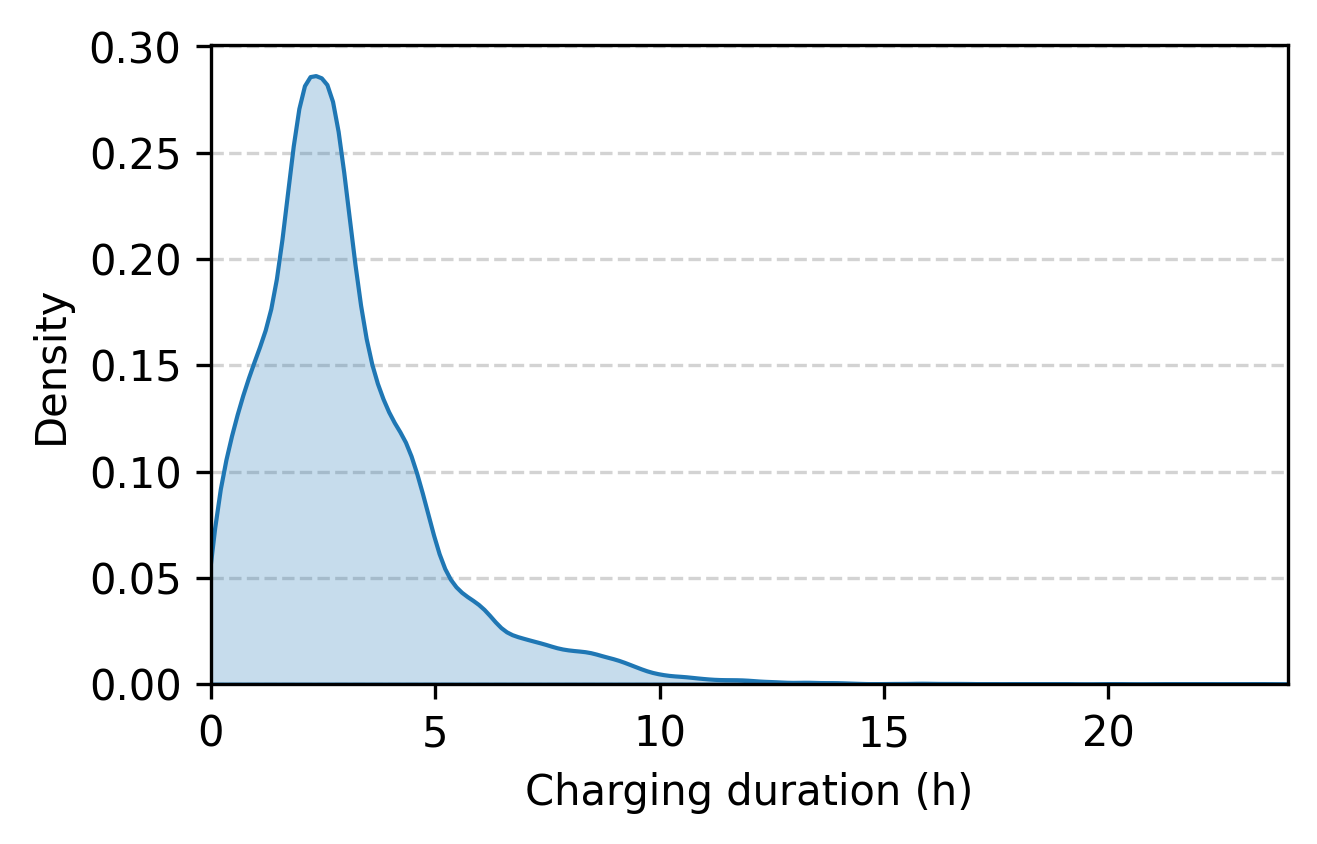

In [33]:
# 与EVDATA数据对比
order = pd.read_csv('compare/EVDATA数据整理/车辆充放电信息.csv')
order['duration'] = (pd.to_datetime(order['etime'])-pd.to_datetime(order['stime'])).dt.total_seconds()
order = order[(order['duration']>0)&(order['duration']<24*60*60)&(order['vehicledata_chargestatus']==1)]
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(1, (10, 3), dpi=300)
ax = plt.subplot(121)
plt.subplots_adjust(left=0.19,right=0.98,top=0.9,bottom=0.19)
sns.kdeplot(data=order,x=order['duration']/3600,ax=ax,fill=True)
ax.set_axisbelow(True)
ax.yaxis.grid(True, linestyle='--', color='lightgray', zorder=0)
#plt.ylabel(size=15)
plt.xlabel('Charging duration (h)')
plt.xlim(0,24)
plt.show()

In [41]:
# 与EVDATA数据对比
order = pd.read_csv('compare/EVDATA数据整理/车辆充放电信息.csv')
order['duration'] = (pd.to_datetime(order['etime'])-pd.to_datetime(order['stime'])).dt.total_seconds()
order = order[(order['duration']>0)&(order['duration']<24*60*60)&(order['vehicledata_chargestatus']==1)]


,vin,count
0,000cdb8748c791b5b57f2fe4c5030f71,0.200000
1,001d60f859a14eef69af220461955840,0.877778
2,00444ab27a5e2f0b5f25313826e56fe7,1.700000
3,00583a7e505a5e0d9ffef46881f614c0,0.144444
4,005e5f0bcc31310c610c1c4f3cbd6565,0.077778
...,...,...
1718,ff678482694be93c3774dea3af46a5b8,0.077778
1719,ff8ade4bb816a15125ae44a5f5e67ac6,0.211111
1720,ff8ecd98725e51a519c5f97d3ab541a5,0.700000
1721,ffb1161e4948722208c432c7226fe4a4,0.211111


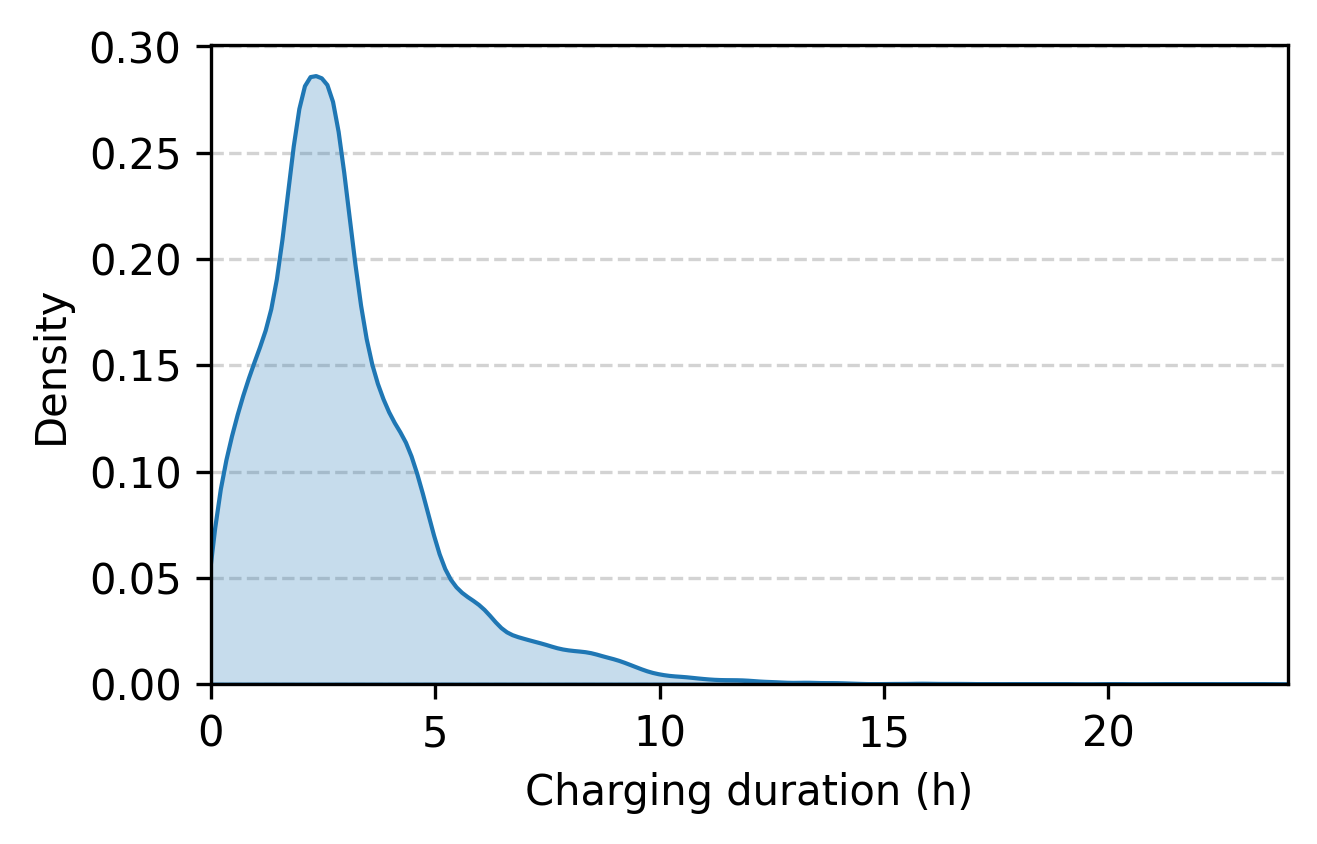

In [46]:
order['duration'] = (pd.to_datetime(order['etime'])-pd.to_datetime(order['stime'])).dt.total_seconds()
order = order[(order['duration']>0)&(order['duration']<24*60*60)&(order['vehicledata_chargestatus']==1)]
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(1, (10, 3), dpi=300)
ax = plt.subplot(121)
plt.subplots_adjust(left=0.19,right=0.98,top=0.9,bottom=0.19)
sns.kdeplot(data=order,x=order['duration']/3600,ax=ax,fill=True)
ax.set_axisbelow(True)
ax.yaxis.grid(True, linestyle='--', color='lightgray', zorder=0)
#plt.ylabel(size=15)
plt.xlabel('Charging duration (h)')
plt.xlim(0,24)
plt.show()

In [59]:
charging_orders['etime'].max()-charging_orders['stime'].min()

Timedelta('6 days 23:50:00')

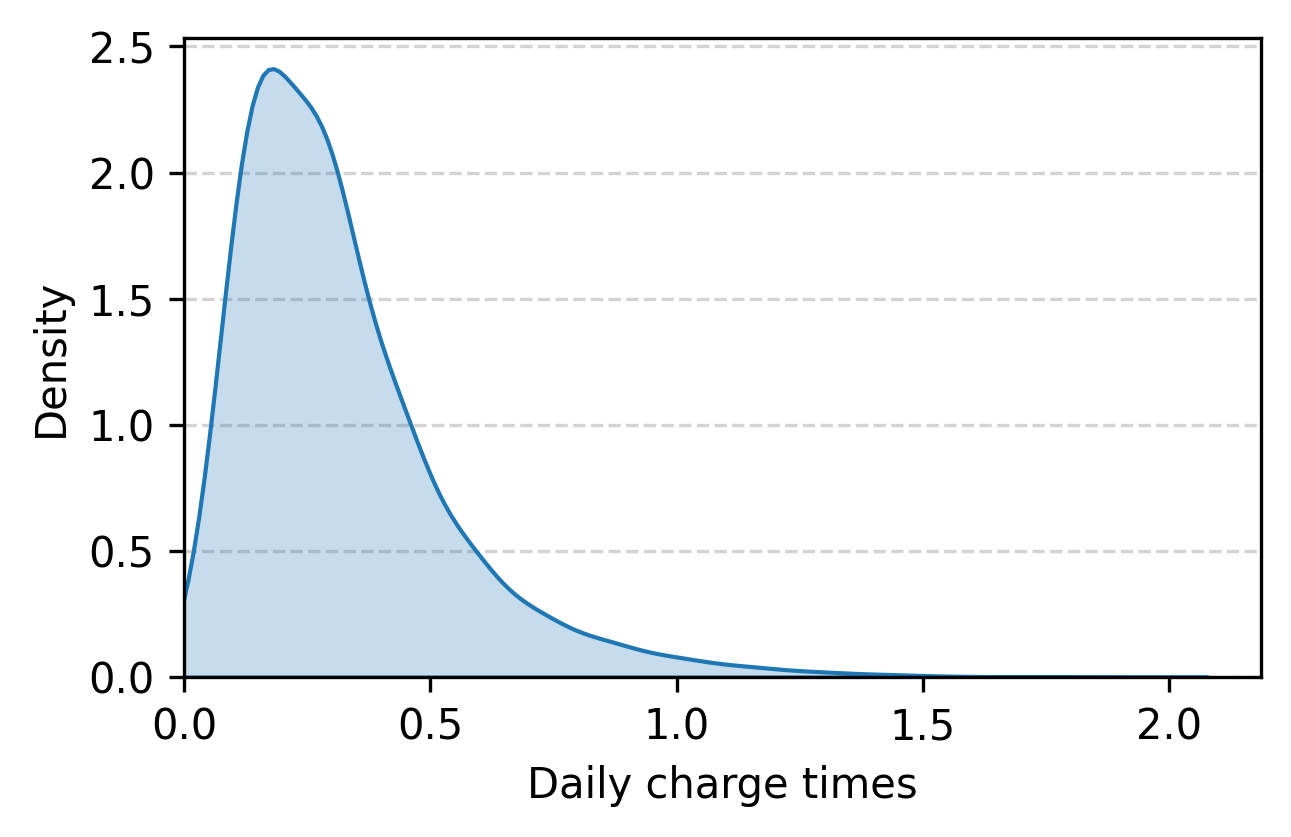

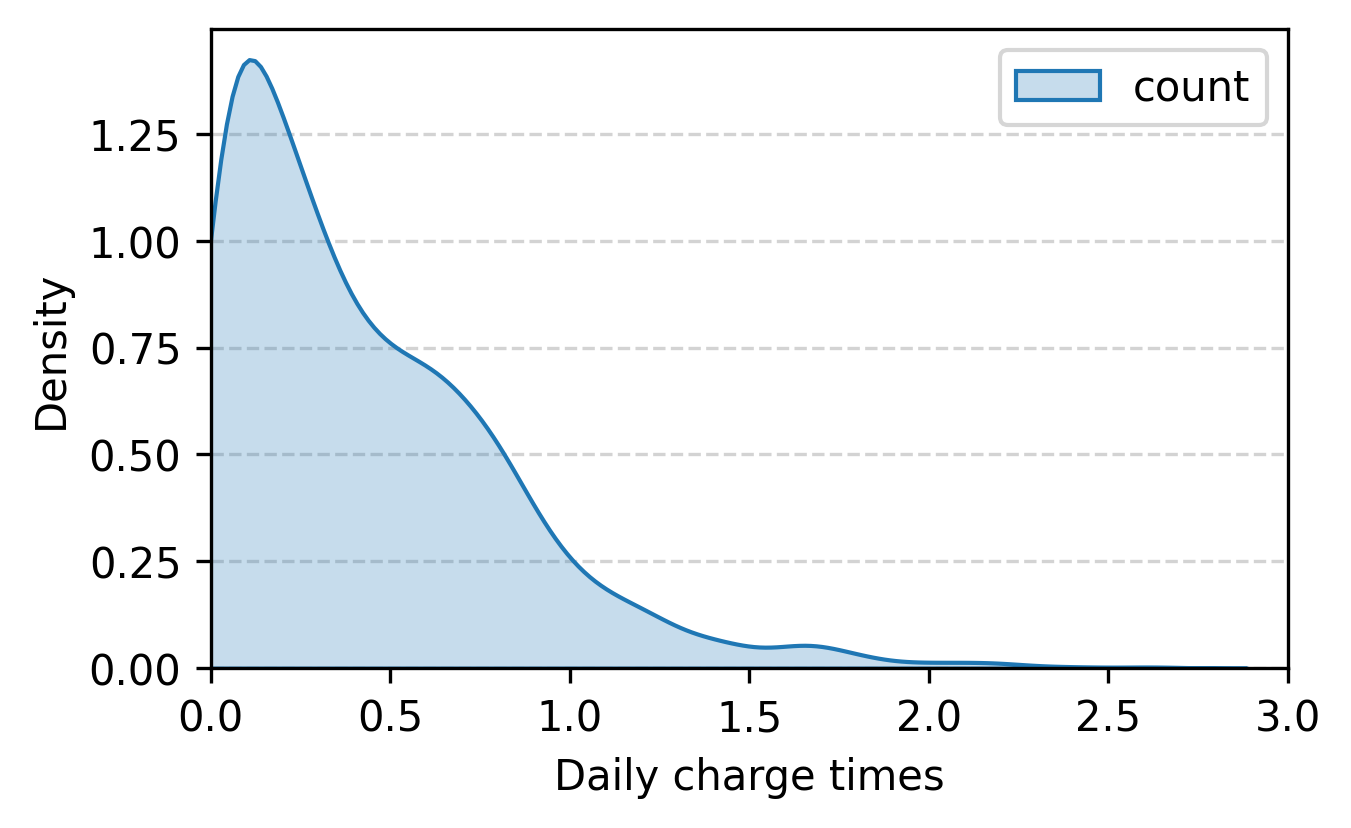

In [76]:

import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(1, (10, 3), dpi=300)
ax = plt.subplot(121)
plt.subplots_adjust(left=0.19,right=0.98,top=0.9,bottom=0.19)
sns.kdeplot(charging_orders.groupby('carid')['order_id'].count()/7,ax=ax,fill=True,bw=0.35,)
ax.set_axisbelow(True)
ax.yaxis.grid(True, linestyle='--', color='lightgray', zorder=0)
#plt.ylabel(size=15)
plt.xlabel('Daily charge times')
plt.xlim(0)
plt.show()

order['duration'] = (pd.to_datetime(order['etime'])-pd.to_datetime(order['stime'])).dt.total_seconds()
order = order[(order['duration']>0)&(order['duration']<24*60*60)&(order['vehicledata_chargestatus']==1)]
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(1, (10, 3), dpi=300)
ax = plt.subplot(121)
plt.subplots_adjust(left=0.19,right=0.98,top=0.9,bottom=0.19)
sns.kdeplot(
(order.groupby('vin')['duration'].count().rename('count')/92).reset_index(),ax=ax,fill=True)
ax.set_axisbelow(True)
ax.yaxis.grid(True, linestyle='--', color='lightgray', zorder=0)
#plt.ylabel(size=15)
plt.xlabel('Daily charge times')
plt.xlim(0,3)
plt.show()

In [ ]:
# 与EVDATA数据对比
order = pd.read_csv('compare/EVDATA数据整理/车辆充放电信息.csv')
order['duration'] = (pd.to_datetime(order['etime'])-pd.to_datetime(order['stime'])).dt.total_seconds()
order = order[(order['duration']>0)&(order['duration']<24*60*60)&(order['vehicledata_chargestatus']==1)]
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(1, (10, 3), dpi=300)
ax = plt.subplot(121)
plt.subplots_adjust(left=0.19,right=0.98,top=0.9,bottom=0.19)
sns.kdeplot(data=order,x=order['duration']/3600,ax=ax,fill=True)
ax.set_axisbelow(True)
ax.yaxis.grid(True, linestyle='--', color='lightgray', zorder=0)
#plt.ylabel(size=15)
plt.xlabel('Charging duration (h)')
plt.xlim(0,24)
plt.show()

In [ ]:
# 与EVDATA数据对比
order = pd.read_csv('compare/EVDATA数据整理/车辆充放电信息.csv')
order['duration'] = (pd.to_datetime(order['etime'])-pd.to_datetime(order['stime'])).dt.total_seconds()
order = order[(order['duration']>0)&(order['duration']<24*60*60)&(order['vehicledata_chargestatus']==1)]
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(1, (10, 3), dpi=300)
ax = plt.subplot(121)
plt.subplots_adjust(left=0.19,right=0.98,top=0.9,bottom=0.19)
sns.kdeplot(data=order,x=order['duration']/3600,ax=ax,fill=True)
ax.set_axisbelow(True)
ax.yaxis.grid(True, linestyle='--', color='lightgray', zorder=0)
#plt.ylabel(size=15)
plt.xlabel('Charging duration (h)')
plt.xlim(0,24)
plt.show()

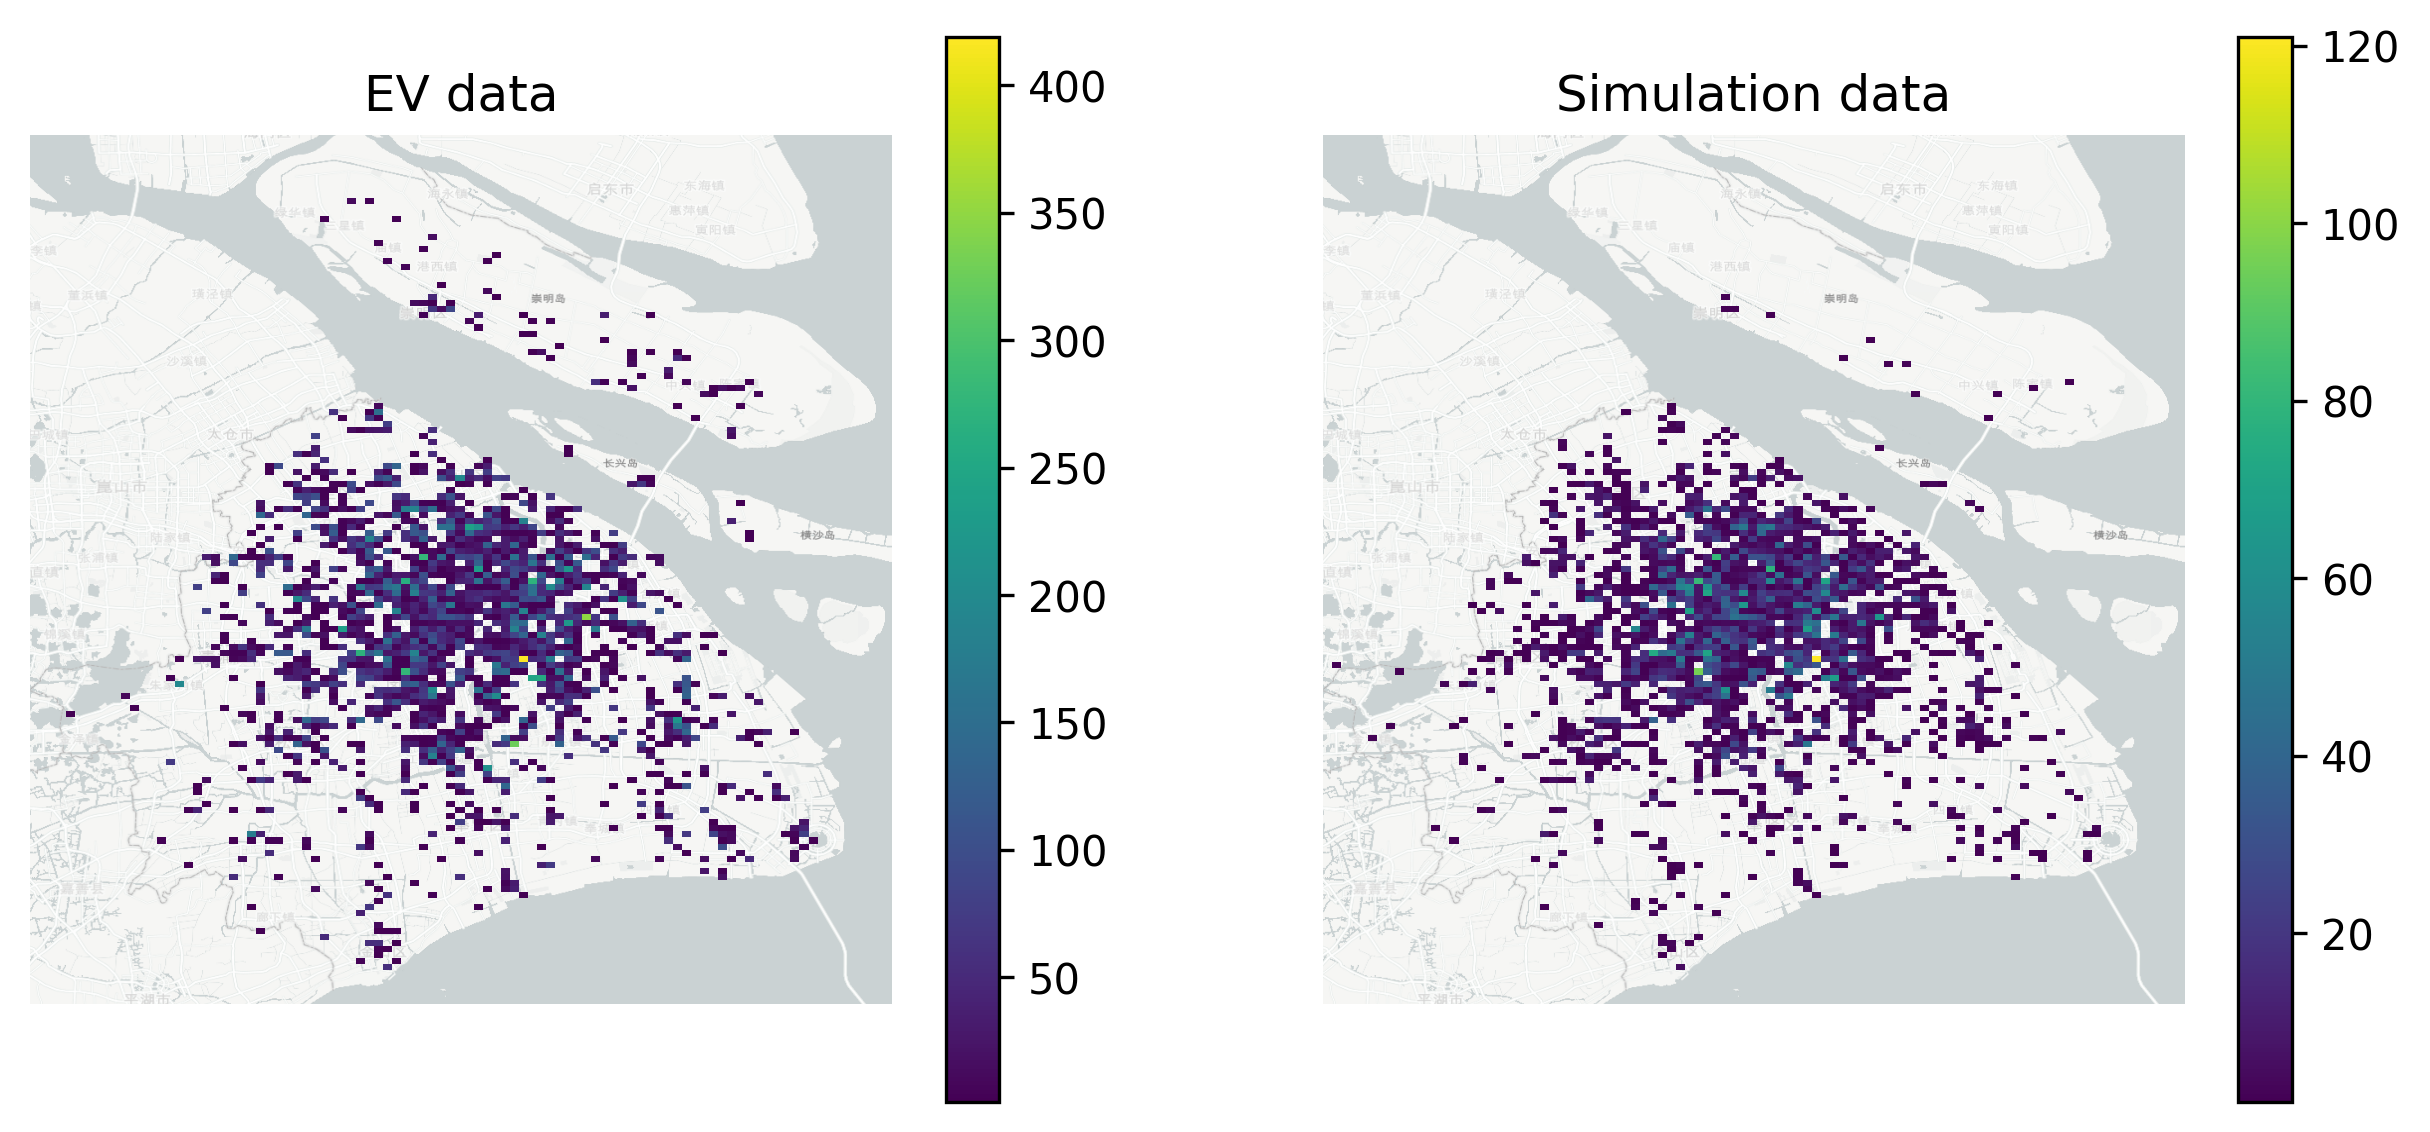

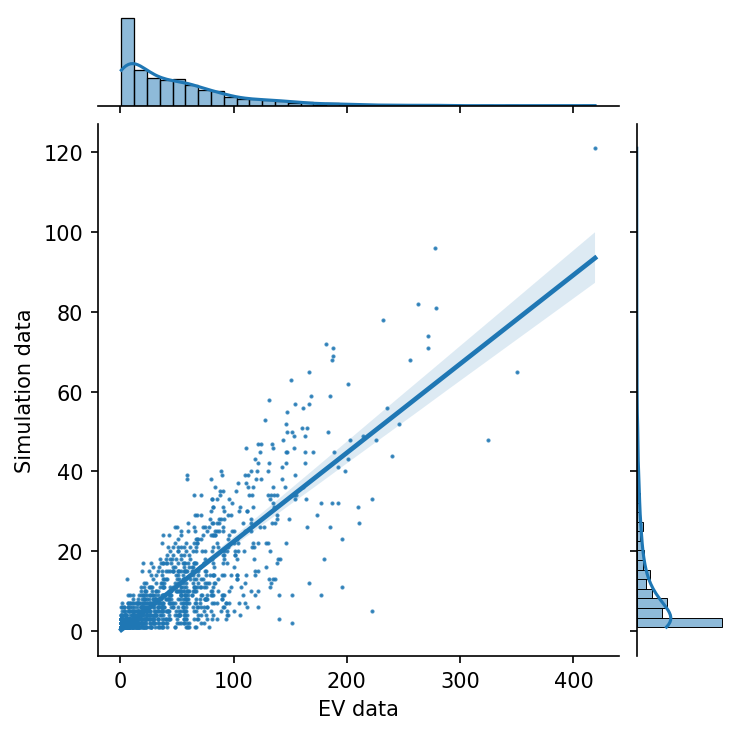

In [10]:
# 与EVDATA数据对比
order = pd.read_csv('compare/EVDATA数据整理/车辆充放电信息.csv')

taz = gpd.read_file('/Users/yuqing/课题/课题-坚果云/上海城建-轨迹生成sci/代码/上海gis/taz.geojson')

# 上海的栅格化参数
paramssh = {'slon': 120.88125,
        'slat': 30.7125,
        'deltalon': 0.0125,
        'deltalat': 0.008333,
        'theta': 0,
        'method': 'rect',
        'gridsize': 1000}
grid,paramssh = tbd.area_to_grid(taz,params=paramssh)

ev_order = order[order['vehicledata_chargestatus']==1]
ev_order['LONCOL'],ev_order['LATCOL'] = tbd.GPS_to_grid(ev_order['slon'],ev_order['slat'],paramssh)
ev_order = ev_order.groupby(['LONCOL','LATCOL']).size().reset_index().rename(columns={0:'count'})
ev_order = pd.merge(ev_order,grid[['LONCOL','LATCOL']],on=['LONCOL','LATCOL'])[['LONCOL','LATCOL','count']]


ev_order['geometry'] = tbd.grid_to_polygon([ev_order['LONCOL'],ev_order['LATCOL']],params=paramssh)
ev_order = gpd.GeoDataFrame(ev_order,geometry='geometry')


charging_order = charging_orders
charging_order['LONCOL'],charging_order['LATCOL'] = tbd.GPS_to_grid(charging_order['lon'],charging_order['lat'],params=paramssh)
charging_order_agg = charging_order.groupby(['LONCOL','LATCOL'])['carid'].count().reset_index()
charging_order_agg = pd.merge(charging_order_agg,grid[['LONCOL','LATCOL']],on=['LONCOL','LATCOL'])[['LONCOL','LATCOL','carid']]

charging_order_agg['geometry'] = tbd.grid_to_polygon([charging_order_agg['LONCOL'],charging_order_agg['LATCOL']],params=paramssh)
charging_order_agg = gpd.GeoDataFrame(charging_order_agg,geometry='geometry')

#画两个子图

import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10, 5), dpi=300)
plt.subplots_adjust(left=0.19,right=0.98,top=0.9,bottom=0.19)
bounds = (120.85, 30.67, 122.04, 31.87)


plt.sca(axs[0])
tbd.plot_map(plt,bounds,zoom = 10,style = 6)
ev_order.plot(column='count',legend=True,ax = axs[0])#,vmax = 100)
plt.xlim(bounds[0],bounds[2])
plt.ylim(bounds[1],bounds[3])

plt.title('EV data')
plt.axis('off')

plt.sca(axs[1])

tbd.plot_map(plt,bounds,zoom = 10,style = 6)
charging_order_agg.plot(column='carid',legend=True,ax = axs[1])#,vmax = 50)
plt.xlim(bounds[0],bounds[2])
plt.ylim(bounds[1],bounds[3])

plt.title('Simulation data')

plt.axis('off')
#plt.ylabel(size=15)
#plt.xlabel(size=15)
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt
# 设置dpi
plt.rcParams['figure.dpi'] = 150
sns.jointplot(data=pd.merge(ev_order.drop('geometry',axis = 1),charging_order_agg.drop('geometry',axis = 1)).rename(columns={'count':'EV data','carid':'Simulation data'}),
              x='EV data',
              y='Simulation data',
              kind='reg',
              scatter_kws={'s':1},
              #调整图的大小
                height=5,
              )


# 可视化系统数据导出

In [ ]:
daypower['']

In [11]:
""" 
# 提取EVDATA的充电订单
order = pd.read_csv('compare/EVDATA数据整理/车辆充放电信息.csv')

taz = gpd.read_file('/Users/yuqing/课题/课题-坚果云/上海城建-轨迹生成sci/代码/上海gis/taz.geojson')

# 上海的栅格化参数
paramssh = {'slon': 120.88125,
        'slat': 30.7125,
        'deltalon': 0.0125,
        'deltalat': 0.008333,
        'theta': 0,
        'method': 'rect',
        'gridsize': 250}


grid,params = tbd.area_to_grid(taz,params=paramssh)

ev_order = order[order['vehicledata_chargestatus']==1]
ev_order['LONCOL'],ev_order['LATCOL'] = tbd.GPS_to_grid(ev_order['slon'],ev_order['slat'],params)
ev_order = ev_order.groupby(['LONCOL','LATCOL']).size().reset_index().rename(columns={0:'count'})
ev_order = pd.merge(ev_order,grid[['LONCOL','LATCOL']],on=['LONCOL','LATCOL'])[['LONCOL','LATCOL','count']]


ev_order['geometry'] = tbd.grid_to_polygon([ev_order['LONCOL'],ev_order['LATCOL']],params=params)
ev_order = gpd.GeoDataFrame(ev_order,geometry='geometry')

ev_order['lon'],ev_order['lat'] = tbd.grid_to_centre([ev_order['LONCOL'],ev_order['LATCOL']],params=params)
ev_order['lon']+= np.random.uniform(-params['deltalon']/2,params['deltalon']/2,len(ev_order))
ev_order['lat']+= np.random.uniform(-params['deltalat']/2,params['deltalat']/2,len(ev_order))
ev_order['count'] = (ev_order['count']*(100/0.2)/(90*24)).astype(int)+1
ev_order[['count','lon','lat']].rename(columns = {'count':'order'}).to_csv('./charge_station/evstationv6.csv',index=False) 
 """

In [12]:
pd.merge(car_infos,car_infos['carid'].drop_duplicates().sample(10000)).to_csv('output/car_infos_sample.csv',index=None)

ValueError: Cannot take a larger sample than population when 'replace=False'

# 车辆甘特图绘制

In [71]:
# 全部曲线输出
color = {'周一': '#cadeea',
         '周二': '#a6bdd7',
         '周三': '#899dc2',
         '周四': '#737fad',
         '周五': '#5b5d8d',
         '周六': '#bf8a9d',
         '周日': '#ac89a3'}
def get_json(df):
    return {'data': df.sort_values('hour')['current_charge_speed'].to_list(),
            'type': 'line',
            'name': df['name'].iloc[0],
            "itemStyle": {
            "color": color[df['name'].iloc[0]]
    },
        "lineStyle": {
        "color": color[df['name'].iloc[0]]
    }
    }

daypower['weekday'] = pd.to_datetime(daypower['date']).dt.weekday
daypower['hour'] = pd.to_datetime(daypower['time']).dt.hour
weekdayname = pd.DataFrame({'weekday':[0,1,2,3,4,5,6],'name':['周一','周二','周三','周四','周五','周六','周日']})
charge_linesdata = pd.merge(daypower,weekdayname).groupby(['hour','name'])['current_charge_speed'].mean().reset_index()
charge_linesdata = charge_linesdata.groupby('name').apply(get_json).to_list()

import os
os.makedirs('output/json',exist_ok=True)
tbd.dumpjson(charge_linesdata,'output/json/charge_linesdata.json')

# 地点充电功率
locationpower['weekday'] = pd.to_datetime(locationpower['time']).dt.weekday
locationpower['hour'] = pd.to_datetime(locationpower['time']).dt.hour

import json
charged_locdata = locationpower[['lon','lat','weekday','hour','current_charge_speed']].rename(columns = {'current_charge_speed':'charged_power'}).to_json(orient='records')
charged_locdata = json.loads(charged_locdata)
tbd.dumpjson(charged_locdata,'output/json/charged_locdata.json')

In [72]:
# 充电订单
charging_orders
charging_orders['weekday'] = pd.to_datetime(charging_orders['date']).dt.weekday
hour_ordercount = pd.merge(charging_orders,weekdayname).groupby(['lon','lat','hour','weekday','name'])['order_id'].count().reset_index()
# 全部曲线输出
color = {'周一': '#cadeea',
         '周二': '#a6bdd7',
         '周三': '#899dc2',
         '周四': '#737fad',
         '周五': '#5b5d8d',
         '周六': '#bf8a9d',
         '周日': '#ac89a3'}
def get_json(df):
    return {'data': df.sort_values('hour')['order_id'].to_list(),
            'type': 'line',
            'name': df['name'].iloc[0],
            "itemStyle": {
            "color": color[df['name'].iloc[0]]
    },
        "lineStyle": {
        "color": color[df['name'].iloc[0]]
    }
    }

order_linesdata = hour_ordercount.groupby(['name','hour'])['order_id'].count().reset_index().groupby('name').apply(get_json).to_list()

import os
os.makedirs('output/json',exist_ok=True)
tbd.dumpjson(order_linesdata,'output/json/order_linesdata.json')

order_locdata = hour_ordercount[['lon','lat','weekday','hour','order_id']].rename(columns = {'order_id':'order_num'}).to_json(orient='records')
order_locdata = json.loads(order_locdata)
tbd.dumpjson(order_locdata,'output/json/order_locdata.json')